# Sentiment analysis of Ukraine using Reddit

## Text Mining and Social Media Mining
## Anna Sikora, Orkhan Amrullayev
## 28.02.2022






In this project we will scrape data with Reddit API for our analysis. Originally, we wanted to take the data about the recent public opinion on Russia and Ukraine, and Politics. Unfortunately Russian subrreddit is frozen, according to the information on the website, Reddit has quarantined subreddit r/Russia due to misinformation, as the internationally condemned Russian invasion of Ukraine continues into its sixth day. r/RussiaPolitics has also been quarantined, just days after it was created in order to host invasion-related discussions.

https://www.reddit.com/r/ukraine/comments/t3smf2/the_russian_subreddit_is_now_quarantined/
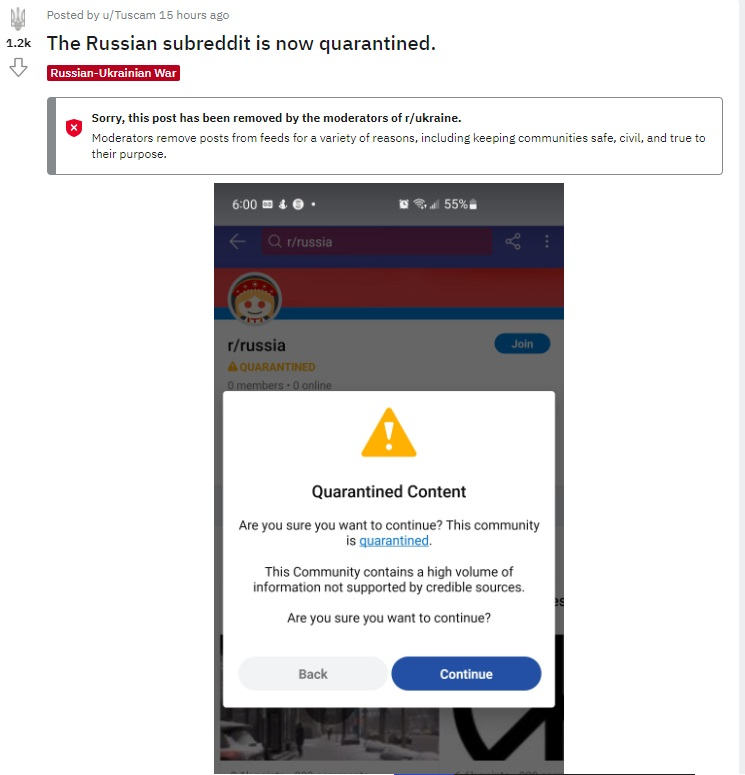


However, we will get the data from the aforementioned 2 subreddits and will perform sentiment analysis.
First we will take the headlines about Ukraine and analyze it. 
Then we will move to the headlines of Politics subreddit to take the public opinion.
Then we will move to one of the most commented submission and analyze its comments. 
In this project we will use different text mining techniques:
- Working with API to scrape the data 
- Using Vader Sentiment Analizer, taking positive, neutral and negative opnions,visualizing them
- Clustering with PCA and TSNE, using TfidfVectorizer
- Word Embedding with One-hot encoding, tf-idf transformation, Word2Vec

In [ ]:
# !pip install praw
# !pip install emoji

Importing necessary libraries

In [200]:
from pprint import pprint
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [201]:
import warnings
warnings.filterwarnings('ignore')

In [111]:
from praw.models import MoreComments
from nltk.corpus import stopwords

from nltk.tokenize import RegexpTokenizer
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer

from nltk.probability import FreqDist


import emoji # Remove emojis

import re # Remove Links

import en_core_web_sm
import spacy


In [202]:
import praw

user_agent = 'Scraper 1.0 by Anna & Orkhan'
reddit = praw.Reddit(
    client_id='XXXX',
    client_secret='XXXX',
    user_agent=user_agent
)

Taking hot submissions about Ukraine subreddit.
Limiting the results to 2000.
Taking titles of these submissions for further use and analysis.

In [204]:
ukraine_headlines = set()

for submission in reddit.subreddit('ukraine').hot(limit=2000):

  ukraine_headlines.add(submission.title)
print(len(ukraine_headlines))

It appears that you are using PRAW in an asynchronous environment.
It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It appears that you are using PRAW in an asynchronous environment.
It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It appears that you are using PRAW in an asynchronous environment.
It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It appears that you are using PRAW in an asynchronous environment.
It is strongly recommended to use Async PRAW: https://asyncpraw.readt

960


In [205]:
df_ukraine = pd.DataFrame(ukraine_headlines)
df_ukraine.head(10)

,0
0,"Conversation of a captured Russian soldier with his mother. Can someone translate, please ?"
1,"Vitali and Wladimir Klitschko, the sons of a Soviet major general, are both former heavyweight champions. Now they’re in a fight unlike any they ever imagined. The prize for this one isn’t a championship belt but the survival of their country."
2,Terrible footage from Kharkiv of what appears to be an MLRS rocket strike in the center of the city.
3,💪World's Strongest Man titled powerlifter Vasyl Virastiuk joins to defence Ukraine.
4,Russian soldier text with his mother before death
5,‘We had peace until you came’ Berdyansk today
6,Vladimir Putin's black belt revoked by international taekwondo organization today. On Sunday the International Judo Federation suspended Putin's status as the federation's honorary president.
7,When you see a russian tank in Ukraine
8,"Info for Ukrainian refugees: the German railway company allows you to go until Nuremberg, Dresden, Berlin and Munich for free. You only need your ID. You can also bring pets and children. FAQ and more on the link."
9,Russian Embassy in the UK blame Russia's invasion of Ukraine on the west


In [206]:
df_ukraine.to_csv('ukraine_headlines.csv', header=False, encoding='utf-8', index=False)

In [207]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

VADER sentiment analysis relies on a dictionary which maps lexical features to emotion intensities called sentiment scores. The sentiment score of a text can be obtained by summing up the intensity of each word in the text

In [208]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer as SIA

sia = SIA()
results = []

for line in ukraine_headlines:
  pol_score = sia.polarity_scores(line)
  pol_score['headline'] = line
  results.append(pol_score)

pprint(results[:3], width=100)

[{'compound': 0.3182,
  'headline': 'Conversation of a captured Russian soldier with his mother. Can someone translate, '
              'please ?',
  'neg': 0.0,
  'neu': 0.827,
  'pos': 0.173},
 {'compound': 0.5423,
  'headline': 'Vitali and Wladimir Klitschko, the sons of a Soviet major general, are both former '
              'heavyweight champions. Now they’re in a fight unlike any they ever imagined. The '
              'prize for this one isn’t a championship belt but the survival of their country.',
  'neg': 0.043,
  'neu': 0.808,
  'pos': 0.15},
 {'compound': -0.5574,
  'headline': 'Terrible footage from Kharkiv of what appears to be an MLRS rocket strike in the '
              'center of the city.',
  'neg': 0.213,
  'neu': 0.787,
  'pos': 0.0}]


In [209]:
df_ukraine = pd.DataFrame.from_records(results)
df_ukraine.head()

,neg,neu,pos,compound,headline
0,0.000,0.827,0.173,0.3182,"Conversation of a captured Russian soldier with his mother. Can someone translate, please ?"
1,0.043,0.808,0.150,0.5423,"Vitali and Wladimir Klitschko, the sons of a Soviet major general, are both former heavyweight champions. Now they’re in a fight unlike any they ever imagined. The prize for this one isn’t a championship belt but the survival of their country."
2,0.213,0.787,0.000,-0.5574,Terrible footage from Kharkiv of what appears to be an MLRS rocket strike in the center of the city.
3,0.000,0.677,0.323,0.5106,💪World's Strongest Man titled powerlifter Vasyl Virastiuk joins to defence Ukraine.
4,0.358,0.642,0.000,-0.5994,Russian soldier text with his mother before death


Adding a new column named label which indicates the prone to negative or positive respectively to -1 and 1.

In [210]:
df_ukraine['label'] = 0
df_ukraine.loc[df_ukraine['compound'] > 0.2, 'label'] = 1
df_ukraine.loc[df_ukraine['compound'] < -0.2, 'label'] = -1
df_ukraine.head()

,neg,neu,pos,compound,headline,label
0,0.000,0.827,0.173,0.3182,"Conversation of a captured Russian soldier with his mother. Can someone translate, please ?",1
1,0.043,0.808,0.150,0.5423,"Vitali and Wladimir Klitschko, the sons of a Soviet major general, are both former heavyweight champions. Now they’re in a fight unlike any they ever imagined. The prize for this one isn’t a championship belt but the survival of their country.",1
2,0.213,0.787,0.000,-0.5574,Terrible footage from Kharkiv of what appears to be an MLRS rocket strike in the center of the city.,-1
3,0.000,0.677,0.323,0.5106,💪World's Strongest Man titled powerlifter Vasyl Virastiuk joins to defence Ukraine.,1
4,0.358,0.642,0.000,-0.5994,Russian soldier text with his mother before death,-1


Saving the dataset for the futher uses

In [211]:
df_ukraine2 = df_ukraine[['headline', 'label']]

In [212]:
df_ukraine2.to_csv('reddit__ukraine_headlines_labels.csv', encoding='utf-8', index=False)

In [213]:
df_ukraine.label.value_counts()

 0    423
-1    325
 1    212
Name: label, dtype: int64

In [214]:
df_ukraine.label.value_counts(normalize=True) * 100

 0    44.062500
-1    33.854167
 1    22.083333
Name: label, dtype: float64

In [215]:
print('Positive headlines: \n')
pprint(list(df_ukraine[df_ukraine['label'] == 1].headline)[:10], width = 200)

print('\n Negative headlines: \n')
pprint(list(df_ukraine[df_ukraine['label'] == -1].headline)[:10], width = 200)

Positive headlines: 

['Conversation of a captured Russian soldier with his mother. Can someone translate, please ?',
 'Vitali and Wladimir Klitschko, the sons of a Soviet major general, are both former heavyweight champions. Now they’re in a fight unlike any they ever imagined. The prize for this one isn’t a '
 'championship belt but the survival of their country.',
 "💪World's Strongest Man titled powerlifter Vasyl Virastiuk joins to defence Ukraine.",
 '‘We had peace until you came’ Berdyansk today',
 'Info for Ukrainian refugees: the German railway company allows you to go until Nuremberg, Dresden, Berlin and Munich for free. You only need your ID. You can also bring pets and children. FAQ and '
 'more on the link.',
 'Mastercard has blocked multiple financial institutions as a result of sanctions imposed on Russia over its invasion of Ukraine. The company has also promised $2 million in humanitarian relief to '
 'Ukraine.',
 'Lock This Subreddit: Only Allow Approved Posters',
 'Ger

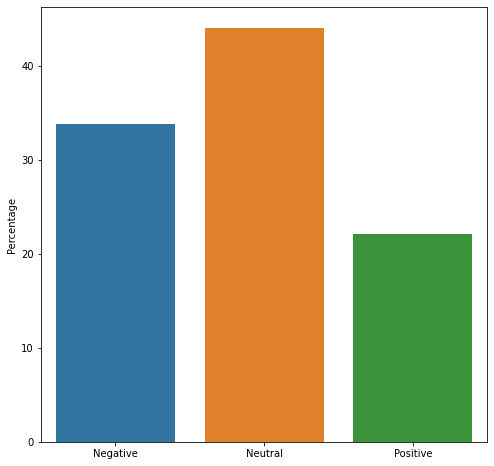

In [216]:
fig, ax = plt.subplots(figsize=(8,8))
counts = df_ukraine.label.value_counts(normalize=True) * 100

sns.barplot(x=counts.index, y=counts, ax=ax)

ax.set_xticklabels(['Negative', 'Neutral', 'Positive'])
ax.set_ylabel('Percentage')

plt.show()

As we can see from the graph that neutral opinions weighs more than each negative and positive opnions. Negative are more than positive.

# Politics subreddit

As we did above, now we are scraping politics subreddit to see the patterns and analyze the sentiments

In [217]:
politics_headlines = set()

for submission in reddit.subreddit('politics').hot(limit=2000):
  politics_headlines.add(submission.title)
  
print(len(politics_headlines))

It appears that you are using PRAW in an asynchronous environment.
It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It appears that you are using PRAW in an asynchronous environment.
It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It appears that you are using PRAW in an asynchronous environment.
It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It appears that you are using PRAW in an asynchronous environment.
It is strongly recommended to use Async PRAW: https://asyncpraw.readt

632


VADER sentiment analysis relies on a dictionary which maps lexical features to emotion intensities called sentiment scores. The sentiment score of a text can be obtained by summing up the intensity of each word in the text

In [218]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer as SIA

sia = SIA()
results = []

for line in politics_headlines:
  pol_score = sia.polarity_scores(line)
  pol_score['headline'] = line
  results.append(pol_score)

pprint(results[:3], width=100)

[{'compound': 0.5574,
  'headline': 'White House Press Secretary Talks Russia, State of the Union, Supreme Court',
  'neg': 0.0,
  'neu': 0.753,
  'pos': 0.247},
 {'compound': 0.3612,
  'headline': "Rep. Lauren Boebert Says Canada And U.S. 'Need To Be Liberated' Like Ukraine",
  'neg': 0.0,
  'neu': 0.828,
  'pos': 0.172},
 {'compound': -0.4404,
  'headline': 'Virginia Republicans block effort to start recreational marijuana sales in '
              'September',
  'neg': 0.225,
  'neu': 0.775,
  'pos': 0.0}]


converting the data into pandas dataframe/


In [220]:
df_politics = pd.DataFrame.from_records(results)
df_politics.head()

,neg,neu,pos,compound,headline
0,0.000,0.753,0.247,0.5574,"White House Press Secretary Talks Russia, State of the Union, Supreme Court"
1,0.000,0.828,0.172,0.3612,Rep. Lauren Boebert Says Canada And U.S. 'Need To Be Liberated' Like Ukraine
2,0.225,0.775,0.000,-0.4404,Virginia Republicans block effort to start recreational marijuana sales in September
3,0.000,0.811,0.189,0.4939,CPAC candidates want to weigh their options for House speaker if elected. Colleagues say Kevin McCarthy's still in good shape.
4,0.252,0.748,0.000,-0.6597,"Stop Donald Trump At All Cost Or Prepare for Democracy in the US to Collapse, Political Scientist Says"


In [222]:
df_politics['label'] = 0
df_politics.loc[df_politics['compound'] > 0.2, 'label'] = 1
df_politics.loc[df_politics['compound'] < -0.2, 'label'] = -1
df_politics.head()

,neg,neu,pos,compound,headline,label
0,0.000,0.753,0.247,0.5574,"White House Press Secretary Talks Russia, State of the Union, Supreme Court",1
1,0.000,0.828,0.172,0.3612,Rep. Lauren Boebert Says Canada And U.S. 'Need To Be Liberated' Like Ukraine,1
2,0.225,0.775,0.000,-0.4404,Virginia Republicans block effort to start recreational marijuana sales in September,-1
3,0.000,0.811,0.189,0.4939,CPAC candidates want to weigh their options for House speaker if elected. Colleagues say Kevin McCarthy's still in good shape.,1
4,0.252,0.748,0.000,-0.6597,"Stop Donald Trump At All Cost Or Prepare for Democracy in the US to Collapse, Political Scientist Says",-1


In [48]:
# saving csv
df_politics_save = df[['headline', 'label']]
df_politics_save.to_csv('reddit_headlines_politics_labels.csv', encoding='utf-8', index=False)

In [224]:
df_politics.label.value_counts()

 0    271
-1    209
 1    152
Name: label, dtype: int64

In [223]:
df_politics.label.value_counts(normalize=True) * 100

 0    42.879747
-1    33.069620
 1    24.050633
Name: label, dtype: float64

Let's have a look at some of the positive and negative headlines for the Politics subreddit. For demonstration purposes we wanted to show just 5 instance from each category and limited the character width to 200 chars.

In [51]:
print('Positive headlines: \n')
pprint(list(df_politics[df_politics['label'] == 1].headline)[:5], width = 200)

print('\n Negative headlines: \n')
pprint(list(df_politics[df_politics['label'] == -1].headline)[:5], width = 200)

Positive headlines: 

["Rep. Lauren Boebert Says Canada And U.S. 'Need To Be Liberated' Like Ukraine",
 'Virginia Republicans block effort to start recreational marijuana sales in September',
 'Stop Donald Trump At All Cost Or Prepare for Democracy in the US to Collapse, Political Scientist Says',
 "Trump, in U-turn on Putin, condemns atrocities, salutes Zelenskyy's courage",
 "Oklahoma's Inhofe confirms he is resigning US Senate seat"]

 Negative headlines: 

['White House Press Secretary Talks Russia, State of the Union, Supreme Court',
 "CPAC candidates want to weigh their options for House speaker if elected. Colleagues say Kevin McCarthy's still in good shape.",
 "Sen. Tom Cotton won't condemn Trump's praise of Putin",
 "'Every Asset They Have in US Will Be Frozen': Biden Orders Massive Sanctions Against Russia",
 "Soaking in CPAC: See Trump's head pasted on Rambo's body, AOC cutouts, Nancy Pelosi toilet paper, and tons of MAGA swag on display in Orlando"]


Now, let's plot them to see the opnions. 

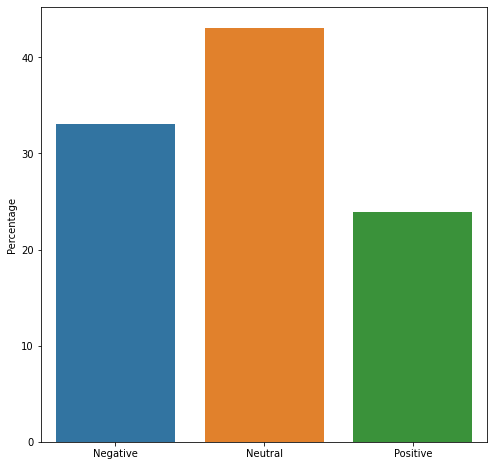

In [52]:
fig, ax = plt.subplots(figsize=(8,8))
counts = df_politics.label.value_counts(normalize=True) * 100

sns.barplot(x=counts.index, y=counts, ax=ax)

ax.set_xticklabels(['Negative', 'Neutral', 'Positive'])
ax.set_ylabel('Percentage')

plt.show()

As we can see from the graph above that, it looks almost same what we had with Ukraine subreddit. Neutral opionions comes first, then it is followed by negative and then positive ones.

# Taking a submission with a few thousand comments of Ukraine subreddit 

In [ ]:
# id == t3pbic

In [69]:
post1 = reddit.submission(id = 't3pbic')

In [298]:
comments_all = []
post1.comments.replace_more(limit=None)
for comments in post1.comments.list():
  comments_all.append(comments.body)

print(comments_all, '\n')

print("Total comments scraped = ", len(comments_all))

['* **DO NOT SHARE ANY INFORMATION ABOUT MOVEMENTS, LOCATION OR IDENTIFICATION OF ANY OF THE UKRAINIAN ARMED FORCES.**\n\n* **DO SHARE AS MUCH AS POSSIBLE INFORMATION ABOUT MOVEMENT OF RUSSIAN TROOPS INSIDE RUSSIA, BELARUS AND UKRAINE INCLUDING: LOCATION, IDENTIFICATIONS, MARKINGS, INSIGNIA.**\n\n#LIST OF RELIABLE SOURCES\n[**UA Ministry of Defense**](https://twitter.com/defenceu)\n\n[**Ukrainian Land Forces**](https://facebook.com/UkrainianLandForces)\n\n[**bell¿ngcat**](https://www.bellingcat.com/)\n\n[**EUvsDISINFO**](https://euvsdisinfo.eu/)\n\n[**Ukraine Interactive Map**](https://liveuamap.com/)\n\n[**Press statement by President von der Leyen**](https://audiovisual.ec.europa.eu/en/video/I-219140)\n\n[**r/ukraine statement**](https://www.reddit.com/r/ukraine/comments/t0b5o8/attention_dos_and_donts/)\n\n[**r/YUROP statement**](https://www.reddit.com/r/YUROP/comments/t01wnk/russia_has_started_its_official_invasion_of/)\n\n#SUPPORT UKRAINE\n[**National Bank of Ukraine Special Accoun

Pre-processing the comments.
Here we will convert all the comments scraped into a string object.

In [72]:
# preprocessing string - convert to a string object

list1 = comments_all
list1 = [str(i) for i in list1]
string_uncleaned = ' , '.join(list1)
string_uncleaned

'* **DO NOT SHARE ANY INFORMATION ABOUT MOVEMENTS, LOCATION OR IDENTIFICATION OF ANY OF THE UKRAINIAN ARMED FORCES.**\n\n* **DO SHARE AS MUCH AS POSSIBLE INFORMATION ABOUT MOVEMENT OF RUSSIAN TROOPS INSIDE RUSSIA, BELARUS AND UKRAINE INCLUDING: LOCATION, IDENTIFICATIONS, MARKINGS, INSIGNIA.**\n\n#LIST OF RELIABLE SOURCES\n[**UA Ministry of Defense**](https://twitter.com/defenceu)\n\n[**Ukrainian Land Forces**](https://facebook.com/UkrainianLandForces)\n\n[**bell¿ngcat**](https://www.bellingcat.com/)\n\n[**EUvsDISINFO**](https://euvsdisinfo.eu/)\n\n[**Ukraine Interactive Map**](https://liveuamap.com/)\n\n[**Press statement by President von der Leyen**](https://audiovisual.ec.europa.eu/en/video/I-219140)\n\n[**r/ukraine statement**](https://www.reddit.com/r/ukraine/comments/t0b5o8/attention_dos_and_donts/)\n\n[**r/YUROP statement**](https://www.reddit.com/r/YUROP/comments/t01wnk/russia_has_started_its_official_invasion_of/)\n\n#SUPPORT UKRAINE\n[**National Bank of Ukraine Special Account

As the comments contain many emojis, we opt for removing them. As a text, they have no added value to the sentence. 

In [76]:
string_emojiless = emoji.get_emoji_regexp().sub(u'', string_uncleaned)

     |████████████████████████████████| 174 kB 4.6 MB/s 
  Created wheel for emoji: filename=emoji-1.6.3-py3-none-any.whl size=170298 sha256=5c32f34eb9464c97239cc2dd8693f6fd5c494a7d9e37d6b80571072f7d62bfea
  Stored in directory: /root/.cache/pip/wheels/03/8b/d7/ad579fbef83c287215c0caab60fb0ae0f30c4d7ce5f580eade
Successfully built emoji


Tokenizing the string with RegexpTokenizer. We could use others, 

In [79]:
# Tokenizing & Cleaning strings

tokenizer = RegexpTokenizer('\w+|\$[\d\.]+|http\S+')
tokenized_string = tokenizer.tokenize(string_emojiless)
print(tokenized_string)

['DO', 'NOT', 'SHARE', 'ANY', 'INFORMATION', 'ABOUT', 'MOVEMENTS', 'LOCATION', 'OR', 'IDENTIFICATION', 'OF', 'ANY', 'OF', 'THE', 'UKRAINIAN', 'ARMED', 'FORCES', 'DO', 'SHARE', 'AS', 'MUCH', 'AS', 'POSSIBLE', 'INFORMATION', 'ABOUT', 'MOVEMENT', 'OF', 'RUSSIAN', 'TROOPS', 'INSIDE', 'RUSSIA', 'BELARUS', 'AND', 'UKRAINE', 'INCLUDING', 'LOCATION', 'IDENTIFICATIONS', 'MARKINGS', 'INSIGNIA', 'LIST', 'OF', 'RELIABLE', 'SOURCES', 'UA', 'Ministry', 'of', 'Defense', 'https', 'twitter', 'com', 'defenceu', 'Ukrainian', 'Land', 'Forces', 'https', 'facebook', 'com', 'UkrainianLandForces', 'bell', 'ngcat', 'https', 'www', 'bellingcat', 'com', 'EUvsDISINFO', 'https', 'euvsdisinfo', 'eu', 'Ukraine', 'Interactive', 'Map', 'https', 'liveuamap', 'com', 'Press', 'statement', 'by', 'President', 'von', 'der', 'Leyen', 'https', 'audiovisual', 'ec', 'europa', 'eu', 'en', 'video', 'I', '219140', 'r', 'ukraine', 'statement', 'https', 'www', 'reddit', 'com', 'r', 'ukraine', 'comments', 't0b5o8', 'attention_dos_and

In [80]:
# converting tokens into lowercase

lower_string_tokenized = [word.lower() for word in tokenized_string]
print(lower_string_tokenized)

['do', 'not', 'share', 'any', 'information', 'about', 'movements', 'location', 'or', 'identification', 'of', 'any', 'of', 'the', 'ukrainian', 'armed', 'forces', 'do', 'share', 'as', 'much', 'as', 'possible', 'information', 'about', 'movement', 'of', 'russian', 'troops', 'inside', 'russia', 'belarus', 'and', 'ukraine', 'including', 'location', 'identifications', 'markings', 'insignia', 'list', 'of', 'reliable', 'sources', 'ua', 'ministry', 'of', 'defense', 'https', 'twitter', 'com', 'defenceu', 'ukrainian', 'land', 'forces', 'https', 'facebook', 'com', 'ukrainianlandforces', 'bell', 'ngcat', 'https', 'www', 'bellingcat', 'com', 'euvsdisinfo', 'https', 'euvsdisinfo', 'eu', 'ukraine', 'interactive', 'map', 'https', 'liveuamap', 'com', 'press', 'statement', 'by', 'president', 'von', 'der', 'leyen', 'https', 'audiovisual', 'ec', 'europa', 'eu', 'en', 'video', 'i', '219140', 'r', 'ukraine', 'statement', 'https', 'www', 'reddit', 'com', 'r', 'ukraine', 'comments', 't0b5o8', 'attention_dos_and

Stop words are words that do not add much value to a sentence. That is why they can safely be removed. In this case meanin of the sentence will not change. An example of stopwords contained in en_core_web_sm includes the following:

In [81]:
# removing stopwords

nlp = en_core_web_sm.load()

all_stopwords = nlp.Defaults.stop_words

text = lower_string_tokenized

tokens_without_sw = [word for word in text if not word in all_stopwords]
print(tokens_without_sw)


['share', 'information', 'movements', 'location', 'identification', 'ukrainian', 'armed', 'forces', 'share', 'possible', 'information', 'movement', 'russian', 'troops', 'inside', 'russia', 'belarus', 'ukraine', 'including', 'location', 'identifications', 'markings', 'insignia', 'list', 'reliable', 'sources', 'ua', 'ministry', 'defense', 'https', 'twitter', 'com', 'defenceu', 'ukrainian', 'land', 'forces', 'https', 'facebook', 'com', 'ukrainianlandforces', 'bell', 'ngcat', 'https', 'www', 'bellingcat', 'com', 'euvsdisinfo', 'https', 'euvsdisinfo', 'eu', 'ukraine', 'interactive', 'map', 'https', 'liveuamap', 'com', 'press', 'statement', 'president', 'von', 'der', 'leyen', 'https', 'audiovisual', 'ec', 'europa', 'eu', 'en', 'video', '219140', 'r', 'ukraine', 'statement', 'https', 'www', 'reddit', 'com', 'r', 'ukraine', 'comments', 't0b5o8', 'attention_dos_and_donts', 'r', 'yurop', 'statement', 'https', 'www', 'reddit', 'com', 'r', 'yurop', 'comments', 't01wnk', 'russia_has_started_its_off

Let's have a look at our stopwords

In [299]:
all_stopwords

{"'d",
 "'ll",
 "'m",
 "'re",
 "'s",
 "'ve",
 'a',
 'about',
 'above',
 'across',
 'after',
 'afterwards',
 'again',
 'against',
 'all',
 'almost',
 'alone',
 'along',
 'already',
 'also',
 'although',
 'always',
 'am',
 'among',
 'amongst',
 'amount',
 'an',
 'and',
 'another',
 'any',
 'anyhow',
 'anyone',
 'anything',
 'anyway',
 'anywhere',
 'are',
 'around',
 'as',
 'at',
 'back',
 'be',
 'became',
 'because',
 'become',
 'becomes',
 'becoming',
 'been',
 'before',
 'beforehand',
 'behind',
 'being',
 'below',
 'beside',
 'besides',
 'between',
 'beyond',
 'both',
 'bottom',
 'but',
 'by',
 'ca',
 'call',
 'can',
 'cannot',
 'could',
 'did',
 'do',
 'does',
 'doing',
 'done',
 'down',
 'due',
 'during',
 'each',
 'eight',
 'either',
 'eleven',
 'else',
 'elsewhere',
 'empty',
 'enough',
 'even',
 'ever',
 'every',
 'everyone',
 'everything',
 'everywhere',
 'except',
 'few',
 'fifteen',
 'fifty',
 'first',
 'five',
 'for',
 'former',
 'formerly',
 'forty',
 'four',
 'from',
 'fron

Now it is time to normalize the words with a process called: Lemmatizing or Stemming.
Both processes are used to cut down words their root words. There is a difference between lemmatizing and stemming.
- Stemming might return a root word that is not an actual word;
- Lemmatizing returns a root word that is an actual language word.

We will only be applying the lemmatizing process to our list object.

In [226]:
# !pip3 install nltk
nltk.download('wordnet')
from nltk.corpus import wordnet

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [227]:
# normalizing words with lemmatizing
lemmatizer = WordNetLemmatizer()
lemmatized_tokens = ([lemmatizer.lemmatize(w) for w in tokens_without_sw])
print(lemmatized_tokens)

['share', 'information', 'movement', 'location', 'identification', 'ukrainian', 'armed', 'force', 'share', 'possible', 'information', 'movement', 'russian', 'troop', 'inside', 'russia', 'belarus', 'ukraine', 'including', 'location', 'identification', 'marking', 'insignia', 'list', 'reliable', 'source', 'ua', 'ministry', 'defense', 'http', 'twitter', 'com', 'defenceu', 'ukrainian', 'land', 'force', 'http', 'facebook', 'com', 'ukrainianlandforces', 'bell', 'ngcat', 'http', 'www', 'bellingcat', 'com', 'euvsdisinfo', 'http', 'euvsdisinfo', 'eu', 'ukraine', 'interactive', 'map', 'http', 'liveuamap', 'com', 'press', 'statement', 'president', 'von', 'der', 'leyen', 'http', 'audiovisual', 'ec', 'europa', 'eu', 'en', 'video', '219140', 'r', 'ukraine', 'statement', 'http', 'www', 'reddit', 'com', 'r', 'ukraine', 'comment', 't0b5o8', 'attention_dos_and_donts', 'r', 'yurop', 'statement', 'http', 'www', 'reddit', 'com', 'r', 'yurop', 'comment', 't01wnk', 'russia_has_started_its_official_invasion_of

Normalizing using PorterStemmer

In [228]:
stemmer = PorterStemmer()
stem_tokens = ([stemmer.stem(s) for s in tokens_without_sw])
print(stem_tokens)

['share', 'inform', 'movement', 'locat', 'identif', 'ukrainian', 'arm', 'forc', 'share', 'possibl', 'inform', 'movement', 'russian', 'troop', 'insid', 'russia', 'belaru', 'ukrain', 'includ', 'locat', 'identif', 'mark', 'insignia', 'list', 'reliabl', 'sourc', 'ua', 'ministri', 'defens', 'http', 'twitter', 'com', 'defenceu', 'ukrainian', 'land', 'forc', 'http', 'facebook', 'com', 'ukrainianlandforc', 'bell', 'ngcat', 'http', 'www', 'bellingcat', 'com', 'euvsdisinfo', 'http', 'euvsdisinfo', 'eu', 'ukrain', 'interact', 'map', 'http', 'liveuamap', 'com', 'press', 'statement', 'presid', 'von', 'der', 'leyen', 'http', 'audiovisu', 'ec', 'europa', 'eu', 'en', 'video', '219140', 'r', 'ukrain', 'statement', 'http', 'www', 'reddit', 'com', 'r', 'ukrain', 'comment', 't0b5o8', 'attention_dos_and_dont', 'r', 'yurop', 'statement', 'http', 'www', 'reddit', 'com', 'r', 'yurop', 'comment', 't01wnk', 'russia_has_started_its_official_invasion_of', 'support', 'ukrain', 'nation', 'bank', 'ukrain', 'special'

Here we can se that information is in form, location is in locat form. This is how StorterStemmer works. It gets roots that all the other words can stem from. They are not always a full work, rather a first part of the word on which other words can be constructed.


Let's save our lemmatized token into a new variable.

In [229]:
cleaned_output = lemmatized_tokens

Now, let's see how many words we left after each part of the pre-processing part. Which contained the following steps:
- romoving emojis, 
- tokenizing, cleaning, 
- remowing stopwords
- lemmatizing

In [231]:
print("Original length of words =", (len(string_uncleaned)))

print('Number of words after romoving emojis =', (len(string_emojiless)))
print('Number of words after romoving emojis, tokenizing and cleaning =', (len(tokenized_string)))
print('Number of words after romoving emojis, tokenizing, cleaning and remowing stopwords =', (len(tokens_without_sw)))
print('Number of words after romoving emojis, tokenizing, cleaning, remowing stopwords and lemmatizing =', (len(lemmatized_tokens)))
print('Number of words for final output =', (len(cleaned_output)))


Original length of words = 396709
Number of words after romoving emojis = 396657
Number of words after romoving emojis, tokenizing and cleaning = 71372
Number of words after romoving emojis, tokenizing, cleaning and remowing stopwords = 34582
Number of words after romoving emojis, tokenizing, cleaning, remowing stopwords and lemmatizing = 34582
Number of words for final output = 34582


## Appling Sentiment Analizer (VADER)

VADER sentiment analysis relies on a dictionary which maps lexical features to emotion intensities called sentiment scores. The sentiment score of a text can be obtained by summing up the intensity of each word in the text

In [93]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer as SIA

sia = SIA()
results = []

for sentences in cleaned_output:
  pol_score = sia.polarity_scores(sentences)
  pol_score['words'] = sentences
  results.append(pol_score)
  
pd.set_option('display.max_columns', None, 'max_colwidth', None)
df = pd.DataFrame.from_records(results)
df

,neg,neu,pos,compound,words
0,0.0,0.0,1.0,0.2960,share
1,0.0,1.0,0.0,0.0000,information
2,0.0,1.0,0.0,0.0000,movement
3,0.0,1.0,0.0,0.0000,location
4,0.0,1.0,0.0,0.0000,identification
...,...,...,...,...,...
34577,0.0,0.0,0.0,0.0000,t
34578,0.0,1.0,0.0,0.0000,choose
34579,0.0,1.0,0.0,0.0000,life
34580,0.0,0.0,1.0,0.6369,best


Now we will add a new column named ‘label’ that filters the words based on the compound score. We will set a criteria for categorizing them. We will a compound score of +- 0.20.

In [232]:
df['label'] = 0

df.loc[df['compound'] > 0.20, 'label'] = 1
df.loc[df['compound'] < -0.20, 'label'] = -1
df.head()

,neg,neu,pos,compound,words,label
0,0.0,0.0,1.0,0.296,share,1
1,0.0,1.0,0.0,0.000,information,0
2,0.0,1.0,0.0,0.000,movement,0
3,0.0,1.0,0.0,0.000,location,0
4,0.0,1.0,0.0,0.000,identification,0


5. Representation Of Sentiment Results
Using a quick value count, we can see that the sentiment for most of the words is neutral in nature; they are also more positive than negative in sentiment.

In [233]:
# label counts for each word

print(df.label.value_counts())

 0    29248
 1     3202
-1     2132
Name: label, dtype: int64


We can clearly see that most of the comments are netural

Visualization

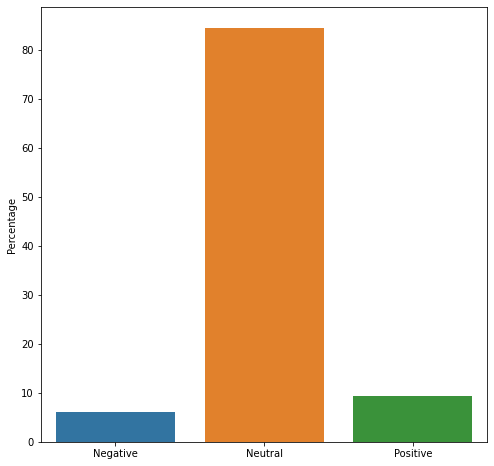

In [234]:
import seaborn as sns

import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(8, 8))

counts = df.label.value_counts(normalize=True) * 100
sns.barplot(x=counts.index, y=counts, ax=ax)
ax.set_xticklabels(['Negative', 'Neutral', 'Positive'])
ax.set_ylabel("Percentage")

plt.show()

Let's remove the neutral words to see the difference between negative and positive opnions. We could play with treshold as well, but this time, we wanted to stick to 0.2 value and the output it generates.

In [235]:
df_positive_negative = df.loc[df['label'] != 0]
df_positive_negative.head()

,neg,neu,pos,compound,words,label
0,0.0,0.0,1.0,0.2960,share,1
8,0.0,0.0,1.0,0.2960,share,1
94,0.0,0.0,1.0,0.4019,support,1
99,0.0,0.0,1.0,0.4019,special,1
222,0.0,0.0,1.0,0.4404,good,1


For each type of opinion how many instances we have:

In [106]:
print(df_positive_negative.label.value_counts())

 1    3202
-1    2132
Name: label, dtype: int64


Visualizing the negative and positive opnions

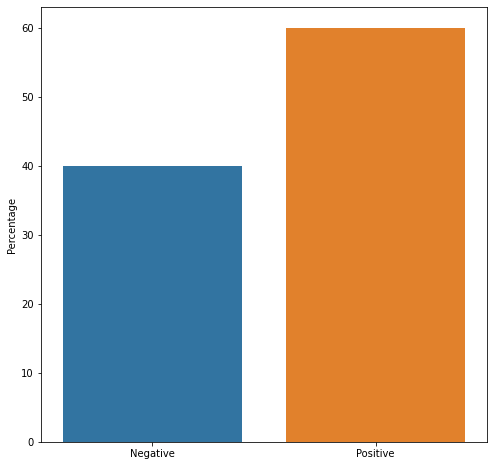

In [107]:
ﬁg, ax = plt.subplots(figsize=(8, 8))

counts = df_positive_negative.label.value_counts(normalize=True) * 100
sns.barplot(x=counts.index, y=counts, ax=ax)
ax.set_xticklabels(['Negative', 'Positive'])
ax.set_ylabel("Percentage")

plt.show()


A few simple visualizations

In [112]:
positive_words = list(df.loc[df['label']==1].words)
print(positive_words)

['share', 'share', 'support', 'special', 'good', 'free', 'awesome', 'like', 'help', 'nice', 'promise', 'like', 'good', 'credit', 'good', 'gain', 'respect', 'liking', 'respect', 'like', 'good', 'better', 'love', 'amazing', 'good', 'good', 'allow', 'like', 'applaud', 'help', 'better', 'good', 'hope', 'god', 'bless', 'better', 'impressed', 'love', 'like', 'ok', 'like', 'free', 'secure', 'valuable', 'promise', 'like', 'like', 'love', 'good', 'redeemed', 'reassuring', 'hope', 'thanks', 'credit', 'credit', 'ok', 'like', 'okay', 'pretty', 'good', 'friend', 'opportunity', 'happy', 'opportunity', 'perfect', 'bold', 'like', 'generous', 'awesome', 'help', 'benefit', 'positive', 'like', 'promise', 'ready', 'truly', 'straight', 'novel', 'like', 'good', 'best', 'yeah', 'like', 'pretty', 'cool', 'praise', 'like', 'hero', 'heroic', 'praise', 'hopefully', 'help', 'good', 'hope', 'important', 'like', 'thanks', 'cool', 'better', 'rich', 'love', 'asset', 'hope', 'hero', 'sure', 'confident', 'sure', 'love'

In [114]:
positive_frequency = FreqDist(positive_words)
pos_freq = positive_frequency.most_common(20)
pos_freq

[('like', 277),
 ('good', 205),
 ('help', 102),
 ('sure', 73),
 ('rescue', 71),
 ('better', 58),
 ('pretty', 56),
 ('yeah', 56),
 ('yes', 54),
 ('free', 46),
 ('great', 40),
 ('promise', 39),
 ('credit', 35),
 ('lol', 35),
 ('love', 34),
 ('best', 34),
 ('care', 32),
 ('definitely', 31),
 ('thanks', 27),
 ('hero', 26)]

In [116]:
# defining negative words
negative_words = list(df.loc[df['label']==-1].words)
print(negative_words)

['threat', 'attacking', 'forget', 'threat', 'warning', 'damn', 'undermine', 'evil', 'flop', 'disliking', 'dislike', 'scared', 'dick', 'war', 'fuck', 'bad', 'war', 'war', 'crime', 'attack', 'hate', 'deny', 'fuck', 'hate', 'dumb', 'struggle', 'threatens', 'crazy', 'obsolete', 'suck', 'anti', 'stop', 'wrong', 'weapon', 'problem', 'problem', 'shit', 'hate', 'bullshit', 'damn', 'hate', 'hating', 'stupid', 'stolen', 'bullshit', 'shit', 'shit', 'stinkier', 'torn', 'sad', 'terrible', 'war', 'pity', 'selfish', 'stop', 'terrorist', 'attack', 'shit', 'hate', 'fuck', 'bad', 'shit', 'attack', 'attacking', 'provoking', 'stop', 'hate', 'liar', 'lied', 'discord', 'illegal', 'worse', 'idiotic', 'forget', 'critical', 'worried', 'damage', 'wtf', 'skeptical', 'enemy', 'reject', 'skeptical', 'risky', 'unfortunately', 'wrong', 'bad', 'anti', 'weapon', 'shit', 'problem', 'battle', 'war', 'fuck', 'stop', 'die', 'villain', 'evil', 'evil', 'forget', 'dumb', 'ignorant', 'threaten', 'shit', 'damn', 'bomb', 'fight

In [117]:
negative_frequency = FreqDist(negative_words)
neg_freq = negative_frequency.most_common(20)
neg_freq

[('shit', 90),
 ('bad', 74),
 ('war', 64),
 ('hate', 52),
 ('fuck', 41),
 ('stop', 41),
 ('wrong', 36),
 ('problem', 34),
 ('fraud', 30),
 ('stupid', 29),
 ('anti', 25),
 ('low', 19),
 ('poor', 19),
 ('dick', 18),
 ('crazy', 17),
 ('bullshit', 17),
 ('boring', 17),
 ('shitty', 16),
 ('death', 16),
 ('hurt', 15)]

# Visualization with WordCloud

We will plot the positive words on white and negative words on black background.

In [118]:
Pos_words = [str(p) for p in pos_freq]  # map to a List of strings
Pos_words_string = ' , '.join(Pos_words) # join all the strings separated by a comma


In [119]:
Neg_words = [str(n) for n in neg_freq]  # map to @ List of strings
Neg_words_string = ' , '.join(Neg_words) # join all the strings separated by a comma

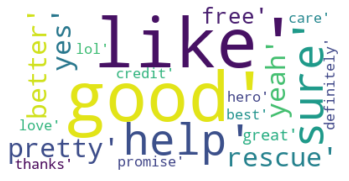

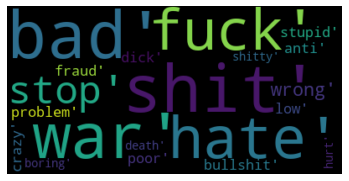

In [121]:
from wordcloud import WordCloud

import matplotlib.pyplot as plt

# Create and generate a word cloud image
wordcloud_positive = WordCloud(background_color='white').generate(Pos_words_string)
wordcloud_negative = WordCloud().generate(Neg_words_string)
# Display the generated image for Positive words
plt.imshow(wordcloud_positive, interpolation='bilinear')
plt.axis("off")

plt.show()

# Display the generated image for Negative words
plt.imshow(wordcloud_negative, interpolation='bilinear')
plt.axis("off")

plt.show()


Let's visualize the words counts with a bar chart

We will include 20 most common positive words by count

In [127]:
import plotly.express as px

pos_freq_df = pd.DataFrame(pos_freq)

pos_freq_df = pos_freq_df.rename(columns = {0: 'Bar Graph Of Frequent Words', 1: 'Count'}, inplace = False)  

fig = px.bar(pos_freq_df, 
             x= 'Bar Graph Of Frequent Words', 
             y= 'Count', 
             title = 'Commonly Used Positive Words By Count')
fig. show()


Let's do the same for negative words to see their counts. Again we are limiting the number of words to 20.

In [128]:
neg_freq_df = pd.DataFrame(neg_freq)

neg_freq_df = neg_freq_df.rename(columns = {0: 'Bar Graph Of Frequent Words', 1: 'Count'}, inplace = False)  

fig = px.bar(neg_freq_df, 
             x= 'Bar Graph Of Frequent Words', 
             y= 'Count', 
             title = 'Commonly Used Negative Words By Count')
fig. show()

# Clustering

In [129]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm

from sklearn.cluster import MiniBatchKMeans
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

In [137]:
data = pd.read_csv(r'reddit_headlines_politics_labels.csv')

In [138]:
# Tf idf
tfidf = TfidfVectorizer(
    min_df = 5,
    max_df = 0.95,
    max_features = 8000,
    stop_words = 'english'
)

In [140]:
tfidf.fit(data.headline)
text = tfidf.transform(data.headline)

In [168]:
# look for optimal no of clusters
def find_optimal_clusters(data, max_k):
    iters = range(2, max_k+1, 2)
    
    sse = []
    for k in iters:
        sse.append(MiniBatchKMeans(n_clusters=k, init_size=1024, batch_size=2048, random_state=20).fit(data).inertia_)
        print('Fit {} clusters'.format(k))
        
    f, ax = plt.subplots(1, 1)
    ax.plot(iters, sse, marker='o')
    ax.set_xlabel('Cluster Centers')
    ax.set_xticks(iters)
    ax.set_xticklabels(iters)
    ax.set_ylabel('SSE')
    ax.set_title('SSE by Cluster Center Plot')

Fit 2 clusters
Fit 4 clusters
Fit 6 clusters
Fit 8 clusters
Fit 10 clusters
Fit 12 clusters
Fit 14 clusters
Fit 16 clusters
Fit 18 clusters
Fit 20 clusters


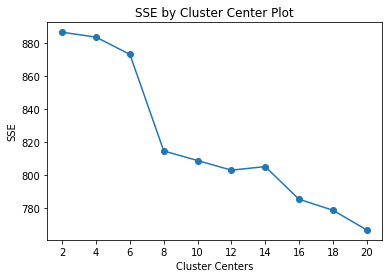

In [170]:
find_optimal_clusters(text, 20)

We take value of 8, number of clusters, according to the elbow.

In [189]:
# set k to 8
clusters = MiniBatchKMeans(n_clusters=8, init_size=1024, batch_size=2048, random_state=20).fit_predict(text)

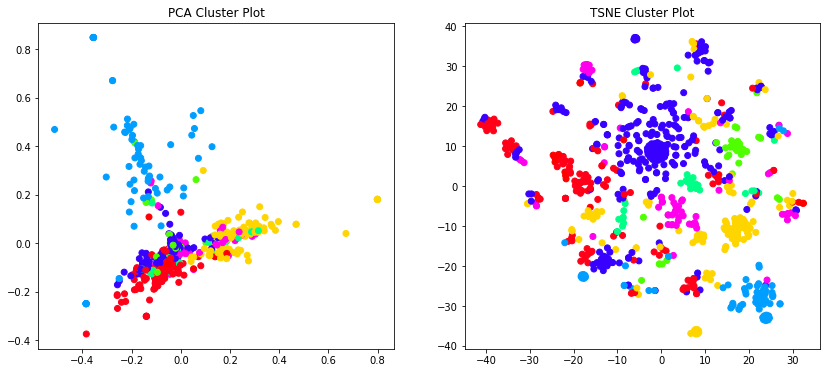

In [196]:
# plot the output
# PCA is better at capturing global structure of the data
# TSNE is better at capturing relations between neighbors

def plot_tsne_pca(data, labels):
    max_label = max(labels)
    max_items = np.random.choice(range(data.shape[0]), size=800, replace=False)
    
    pca = PCA(n_components=2).fit_transform(data[max_items,:].todense())
    tsne = TSNE().fit_transform(PCA(n_components=30).fit_transform(data[max_items,:].todense()))
    
    
    idx = np.random.choice(range(pca.shape[0]), size=800, replace=False)
    label_subset = labels[max_items]
    label_subset = [cm.hsv(i/max_label) for i in label_subset[idx]]
    
    f, ax = plt.subplots(1, 2, figsize=(14, 6))
    
    ax[0].scatter(pca[idx, 0], pca[idx, 1], c=label_subset)
    ax[0].set_title('PCA Cluster Plot')
    
    ax[1].scatter(tsne[idx, 0], tsne[idx, 1], c=label_subset)
    ax[1].set_title('TSNE Cluster Plot')
  
plot_tsne_pca(text, clusters)

Here we changed the values and clustered again

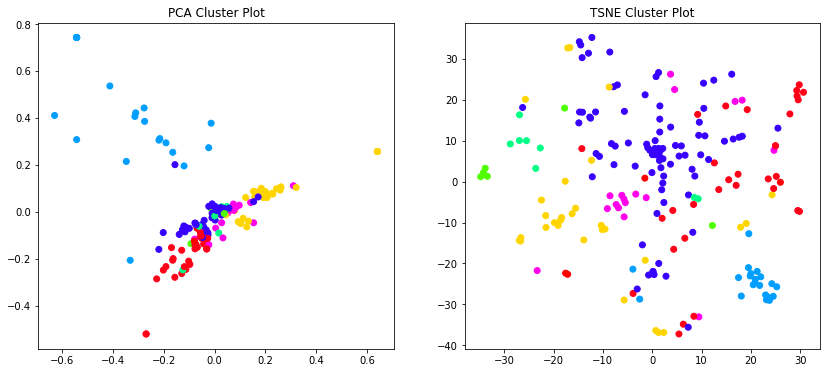

In [197]:
# plot the output
# PCA is better at capturing global structure of the data
# TSNE is better at capturing relations between neighbors

def plot_tsne_pca(data, labels):
    max_label = max(labels)
    max_items = np.random.choice(range(data.shape[0]), size=800, replace=False)
    
    pca = PCA(n_components=2).fit_transform(data[max_items,:].todense())
    tsne = TSNE().fit_transform(PCA(n_components=30).fit_transform(data[max_items,:].todense()))
    
    
    idx = np.random.choice(range(pca.shape[0]), size=200, replace=False)
    label_subset = labels[max_items]
    label_subset = [cm.hsv(i/max_label) for i in label_subset[idx]]
    
    f, ax = plt.subplots(1, 2, figsize=(14, 6))
    
    ax[0].scatter(pca[idx, 0], pca[idx, 1], c=label_subset)
    ax[0].set_title('PCA Cluster Plot')
    
    ax[1].scatter(tsne[idx, 0], tsne[idx, 1], c=label_subset)
    ax[1].set_title('TSNE Cluster Plot')
    
plot_tsne_pca(text, clusters)

Here you can see the first 15 instance of each cluster according to their TFIDF score

In [236]:
# top keywords based on their TFIDF score to see if we can spot any trends
def get_top_keywords(data, clusters, labels, n_terms):
    df = pd.DataFrame(data.todense()).groupby(clusters).mean()
    
    for i,r in df.iterrows():
        print('\nCluster {}'.format(i))
        print(','.join([labels[t] for t in np.argsort(r)[-n_terms:]]))
            
get_top_keywords(text, clusters, tfidf.get_feature_names(), 15)


Cluster 0
russia,refugees,canada,free,weapons,million,aid,provide,tank,soldiers,anti,usd,ukraine,100,000

Cluster 1
captured,oligarch,kharkiv,civilians,convoy,tank,propaganda,troops,war,people,military,soldiers,soldier,ukraine,russian

Cluster 2
truth,want,army,russian,civilians,looks,putin,fuel,coming,need,use,ukrainians,ukraine,fight,russians

Cluster 3
says,belarusian,ukraine,raid,near,russia,sirens,air,troops,region,time,russian,convoy,belarus,kyiv

Cluster 4
wants,state,article,fucking,army,need,stop,russian,vladimir,world,oligarchs,ukraine,war,russia,putin

Cluster 5
don,war,like,kherson,air,today,обл,slava,ukraini,right,just,help,ukrainians,kharkiv,russia

Cluster 6
jets,people,tanks,country,ukraine,poland,border,free,soldier,forces,army,soldiers,refugees,russian,ukrainian

Cluster 7
sending,supports,says,fight,european,weapons,invasion,president,membership,application,people,war,russia,eu,ukraine


# Word Embedding

- One-hot encoding
- tf-idf transformation
- Word2Vec

Removing numbers from the text as they do not give much value or information to the sentences. So, we will remove numeric values first to obtain a more clear set of words.

In [252]:
# imports
import re
# function to remove numbers
def remove_numbers(text):
    # define the pattern to keep
    pattern = r'[^a-zA-z.,!?/:;\"\'\s]' 
    return re.sub(pattern, '', text)

In [260]:
comments_all[0]

'* **DO NOT SHARE ANY INFORMATION ABOUT MOVEMENTS, LOCATION OR IDENTIFICATION OF ANY OF THE UKRAINIAN ARMED FORCES.**\n\n* **DO SHARE AS MUCH AS POSSIBLE INFORMATION ABOUT MOVEMENT OF RUSSIAN TROOPS INSIDE RUSSIA, BELARUS AND UKRAINE INCLUDING: LOCATION, IDENTIFICATIONS, MARKINGS, INSIGNIA.**\n\n#LIST OF RELIABLE SOURCES\n[**UA Ministry of Defense**](https://twitter.com/defenceu)\n\n[**Ukrainian Land Forces**](https://facebook.com/UkrainianLandForces)\n\n[**bell¿ngcat**](https://www.bellingcat.com/)\n\n[**EUvsDISINFO**](https://euvsdisinfo.eu/)\n\n[**Ukraine Interactive Map**](https://liveuamap.com/)\n\n[**Press statement by President von der Leyen**](https://audiovisual.ec.europa.eu/en/video/I-219140)\n\n[**r/ukraine statement**](https://www.reddit.com/r/ukraine/comments/t0b5o8/attention_dos_and_donts/)\n\n[**r/YUROP statement**](https://www.reddit.com/r/YUROP/comments/t01wnk/russia_has_started_its_official_invasion_of/)\n\n#SUPPORT UKRAINE\n[**National Bank of Ukraine Special Account

In [269]:
comments_all_without_numbers = []

for i in comments_all:
  comments_all_without_numbers.append(remove_numbers(i))

In [ ]:
comments_all_without_numbers

Removing links from the text since most of the descriptions gives the information about the link and its context. SO removing the hyperlinks will make our dataset much more clear.

So we use regular expression to find and remove them.

In [271]:
# imports
from bs4 import BeautifulSoup

URLless_string = []
for i in comments_all_without_numbers:
    URLless_string.append(re.sub(r'\w+:\/{2}[\d\w-]+(\.[\d\w-]+)*(?:(?:\/[^\s/]*))*', '', i))

In [274]:
# one-hot encoding

from sklearn.feature_extraction.text import CountVectorizer

# create a CountVectorizer object
vectorizer = CountVectorizer()
corpus = URLless_string

# learn the vocabulary and store CountVectorizer sparse matrix in X
X = vectorizer.fit_transform(corpus)

# retrieve feature names
print(vectorizer.get_feature_names())

# retrieving the matrix in the numpy form
print(X.toarray())

# transforming a new document according to learn vocabulary
vectorizer.transform(['Our new sentence']).toarray()

['____', '__latestwithcomments__new', '_entirely_', 'aajor', 'abandon', 'abandoned', 'ability', 'able', 'abolish', 'abondoned', 'about', 'above', 'abroad', 'absolute', 'absolutely', 'absolutes', 'absolves', 'absurd', 'absurdities', 'absurdly', 'abuse', 'abused', 'ac', 'acceleration', 'accept', 'acceptable', 'accepted', 'acces', 'access', 'accessible', 'accessing', 'accidentally', 'accidents', 'accomplish', 'accomplished', 'accomplishment', 'accomplishments', 'according', 'account', 'accountable', 'accounts', 'accrediting', 'accredits', 'accumulate', 'accumulated', 'accuracy', 'accurate', 'accurately', 'accusation', 'accusations', 'accuse', 'accused', 'accusing', 'achieavable', 'achievable', 'achievements', 'achieving', 'acknowledge', 'acknowledging', 'acquisition', 'across', 'act', 'acted', 'acting', 'action', 'actions', 'active', 'actively', 'activephasedarray', 'activist', 'activity', 'actor', 'actors', 'acts', 'actual', 'actually', 'acutely', 'ad', 'adam', 'adaptation', 'adapted', '

array([[0, 0, 0, ..., 0, 0, 0]])

In [247]:
X.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

We have a few transformation techniques that we can use in Natural Language Processing.
They are: 
- Bag of Words (BOW);
- Term Frequency and Inverse document Frequency (TFIDF)
- Word Embedding using Embedding Layer
- Word to Vectors

In the following cells we will aply them one by one.

In [275]:
from sklearn.feature_extraction.text import TfidfTransformer
# create tf-idf object

transformer = TfidfTransformer(smooth_idf=False)

# X can be obtained as X.toarray() from the previous snippet
X = X.toarray()

# learn the vocabulary and store tf-idf sparse matrix in tfidf
tfidf = transformer.fit_transform(X)

# retrieving matrix in numpy form as we did it before
tfidf.toarray()   

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [297]:
stopwords = ["meme"]
for word in list(URLless_string): 
    if word in stopwords:
        URLless_string.remove(word)

In [296]:
# Word2Vec

from gensim.models import word2vec
corpus = URLless_string

# we need to pass splitted sentences to the model
tokenized_sentences = [sentence.split() for sentence in corpus]
model = word2vec.Word2Vec(tokenized_sentences, min_count=1)

print(model)
print(model['sentence'])

words = list(model.wv.vocab)
print(words)

Word2Vec(vocab=11247, size=100, alpha=0.025)
[ 5.1144091e-03  8.4975641e-03 -1.7337197e-03  4.6297195e-03
 -2.6181333e-03  7.7102985e-03  1.4700114e-03 -1.3528955e-02
 -2.2387663e-02  7.8177694e-03 -3.9468845e-03  8.3972858e-03
  3.6881496e-03  2.5379125e-03 -1.7018994e-02  8.5172476e-03
 -8.3765173e-03 -5.9893038e-03 -7.4958568e-04 -7.8472767e-06
 -1.9168390e-02  8.3293756e-03  9.6213265e-04 -1.7475167e-02
 -7.3368349e-03  9.0306615e-03  1.0108734e-02  1.3591173e-02
 -2.8008446e-03  1.1698789e-03  4.7879284e-03  1.8476850e-03
 -1.9169701e-04  1.0976703e-02  4.0267394e-03  7.4828658e-03
 -7.9572462e-03  5.1745898e-03 -8.0051832e-03  3.3264249e-03
 -9.7391075e-03 -7.2133755e-03  2.2747640e-03  4.7379886e-03
 -5.4996675e-03  5.4882299e-03 -3.0347058e-03 -6.5332158e-03
  8.5396757e-03  1.5137852e-03  1.6510447e-02 -4.5641717e-03
 -2.4967857e-03 -1.2543823e-02 -7.4376855e-03  1.0892292e-02
  1.6738601e-03 -1.7487135e-03 -9.1411127e-03  1.4778659e-02
 -7.0483936e-04  3.4023109e-03 -3.821003